In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
%matplotlib inline
plt.rcParams['figure.figsize'] = [6/2 * (1+ np.sqrt(5)), 6 ]
plt.rcParams['lines.linewidth'] = 3

[ 12.83533727   0.01577292   0.4850681 ] [  1.46363620e-01   3.41866938e-05   1.93301244e-02]


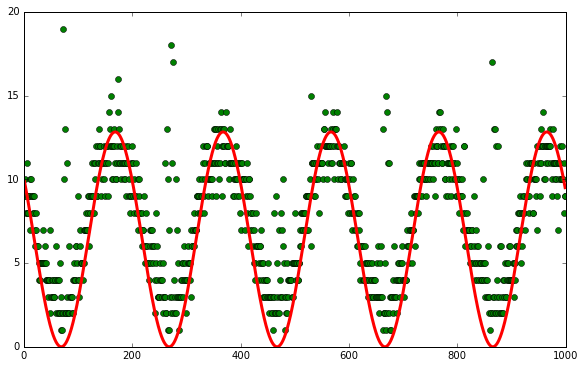

In [30]:
def _get_freq(T,V):
    fft = np.fft.rfft(V)
    freq = np.fft.rfftfreq(len(T), d = np.diff(T)[0])

    #Elimino el máximo inicial, que es un artefácto del algoritmo
    freq = freq[1:]
    fft = np.abs(fft[1:])

    #Obtengo el valor máximo, que va a ser la fundamental de la señal
    max_fft = fft == fft.max()

    #Ploteo de debuggeo

    #plt.plot(freq[freq < 15], fft[freq < 15],"bo-")
    #plt.plot(freq[max_fft], fft[max_fft],"ro")

    #Devuelvo la frecuencia, como float
    return freq[max_fft][0]



A = pd.read_csv("./azul/pol_fibra_azul_baja_p_4.csv", sep=",", comment="#").values

A = A[A[:,0] < 1000]

#A[:,1] -= A[:,1].min()
ind = A[:,1] < 20


f = lambda x, A, w, f: A * np.cos(w * x + f)**2
beta0 = [10, 3 * _get_freq(A[:,0],A[:,1]), np.pi/2]

plt.plot(A[ind,0],A[ind,1],"go")

p, cov = sp.optimize.curve_fit(f, A[ind,0], A[ind,1], p0 = beta0)
print(p, np.sqrt(np.diag(cov)))

t = np.linspace(A[:,0].min(), A[:,0].max(), 10000)
plt.plot(t, f(t, *p), "r-")


[ 22.20362857   2.98281529   1.61361832] [ 0.00684994  0.00015229  0.0002698 ]


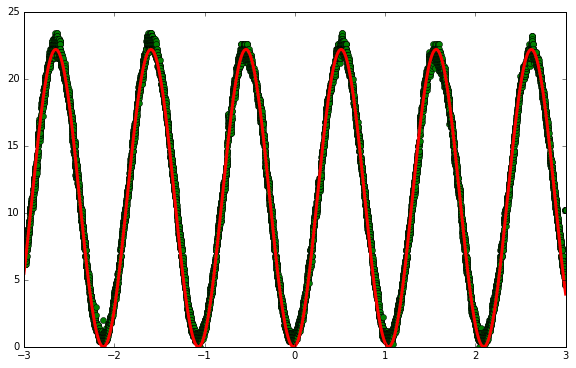

In [26]:
A = pd.read_csv("./pol_laser_sin_ruido.csv", sep=",", comment="#").values

A[:,1] -= A[:,1].min()

f = lambda x, A, w, f: A * np.cos(w * x + f)**2
beta0 = [-A[:,1].max(), 2.5, np.pi/2]

plt.plot(A[:,0],A[:,1],"go")

p, cov = sp.optimize.curve_fit(f, A[:,0], A[:,1], p0 = beta0)
print(p, np.sqrt(np.diag(cov)))

t = np.linspace(A[:,0].min(), A[:,0].max(), 10000)
plt.plot(t, f(t, *p), "r-")
